# Group 21 - Robin Mathew and Abhishek Agarwal

In [4]:
# Comment the below install lines if pandasql is already installed
! pip install pandasql


In [5]:
from pandasql import sqldf
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import SCORERS
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
# importing the SWIGGYTO customer dataset
swiggyToDataSet = pd.read_excel("Food Orders - Shared-1.xlsx")
swiggyToDataSet.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [7]:
# Verifying shape of the dataset
swiggyToDataSet.shape

(60, 21)

In [8]:
# Renaming few feature names for clarity
swiggyToDataSet.rename(columns = {'DateTime': 'OrderDateTime', 'Delivery Time': 'DeliveryDateTime', 'ST': 'ServiceTax'}, inplace = True)
# Verifying key statistics of the dataset
swiggyToDataSet.describe(include='all')

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating
count,58.000000,0.0,60,59.000000,59,60.0,36,59,24.000000,1.0,...,60.0,28.0,60.0,60.0,24.000000,59,59,59,59,57.000000
unique,NaN,NaN,35,NaN,2,20.0,3,37,NaN,NaN,...,3.0,3.0,2.0,2.0,NaN,2,5,3,2,NaN
top,NaN,NaN,1-July-2020 8.38 PM,NaN,Delivered,300.0,PRO,5-July-2020 8.38 PM,NaN,NaN,...,20.0,10.0,10.0,5.0,NaN,Y,DAL;CHICKEN;ROTI,BING,VEG,NaN
freq,NaN,NaN,4,NaN,36,8.0,28,4,NaN,NaN,...,39.0,16.0,59.0,59.0,NaN,36,13,28,36,NaN
mean,52.655172,NaN,NaN,3.593220,NaN,NaN,NaN,NaN,33.750000,5.0,...,NaN,NaN,NaN,NaN,4.875000,NaN,NaN,NaN,NaN,2.403509
std,101.657587,NaN,NaN,1.340595,NaN,NaN,NaN,NaN,18.371173,NaN,...,NaN,NaN,NaN,NaN,0.612372,NaN,NaN,NaN,NaN,1.771396
min,1.000000,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN,-25.000000,5.0,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000
25%,13.250000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,25.000000,5.0,...,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000
50%,27.500000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,25.000000,5.0,...,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,3.000000
75%,41.750000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,50.000000,5.0,...,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,4.000000


In [9]:
# Verifying metadata info of the dataset
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   OrderDateTime      60 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               60 non-null     object 
 6   PromoCode          36 non-null     object 
 7   DeliveryDateTime   59 non-null     object 
 8   Discount           24 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   60 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  60 non-null     object 
 14  ServiceTax         60 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            59 non-nu

Inferences from basic verification of dataset:

There are 20 feature variables and 1 target (Rating) variable. 

The dataset has 60 records/transactions.

There are null/missing values across multiple features, examples: PromoCode, Surge Charges, Tip, Rating etc.

There are multiple features with incorrect data types, examples: ServiceTax (as Object), Cost (as Object), OrderDateTime and DeliveryDateTime as object etc.

There are multiple features with data integrity issues, examples: min value of Distance and Discount are negatives


# Data Quality Analysis and Imputation

#    Missing Values in Features

In [10]:
# Checking for missing values
swiggyToDataSet.isnull().sum()

ID                    2
Provider             60
OrderDateTime         0
Distance              1
Status                1
Cost                  0
PromoCode            24
DeliveryDateTime      1
Discount             36
Paid amount          59
Payment mode          1
Delivery charges      0
Surge charges        32
Packaging charges     0
ServiceTax            0
Tip                  36
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                3
dtype: int64

In [11]:
# Verifying missing values in orderid
missing = swiggyToDataSet[swiggyToDataSet['ID'].isnull()]
missing

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating
18,NaN,NaN,2-July-2020 9.38 AM,3.0,Delivered,300,NaN,2-July-2020 9.58 AM,50.0,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,3.0
23,NaN,NaN,3-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10.0,5.0,...,Y,DAL;ROTI,NO,VEG,2.0,NaN,NaN,NaN,NaN,NaN


The second row above having null value in order id looks like an erroneous row. The data values for certain columns like Surge Charges (DAL;ROTI), ST (service tax as VEG), Packaging charges (NO) etc. are incorrect. Also many key features have no values in this record. Hence this row needs to be dropped. Dropping this row may automaticlly reduce the null values, inconsistent data etc issues in many other features.

The first row above has proper values in the columns unlike the second row and hence can be retained by imputing the order id value. As seen earlier, the min order id is 1 and max is 467, so for the time being we can update this with 0.

In [12]:
# Dropping the row with incorrect values by index (23)
swiggyToDataSet=swiggyToDataSet.drop(23)
# Replacing the ID in other null record with 0
swiggyToDataSet['ID'].fillna(value=0, inplace=True)
swiggyToDataSet.isnull().sum()

ID                    0
Provider             59
OrderDateTime         0
Distance              0
Status                0
Cost                  0
PromoCode            24
DeliveryDateTime      0
Discount             36
Paid amount          59
Payment mode          0
Delivery charges      0
Surge charges        32
Packaging charges     0
ServiceTax            0
Tip                  36
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

In [13]:
# Verifying values in promo code
swiggyToDataSet['PromoCode'].unique()

array(['PRO', 'BF', nan], dtype=object)

The promo code feature has 2 values: PRO and BF which are valid promo codes and all null/missing values maybe considered as orders where the customer did not use any promo code. Hence imputing the missing values here with a new value for Promo Code: "NOCODE"

In [14]:
# Imputing promo code missing values with "NOCODE"
swiggyToDataSet['PromoCode'].fillna(value='NOCODE', inplace=True)
swiggyToDataSet.isnull().sum()

ID                    0
Provider             59
OrderDateTime         0
Distance              0
Status                0
Cost                  0
PromoCode             0
DeliveryDateTime      0
Discount             36
Paid amount          59
Payment mode          0
Delivery charges      0
Surge charges        32
Packaging charges     0
ServiceTax            0
Tip                  36
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

Discount feature has 36 missing values which can be assumed as orders where discount was not applicable or 0 discount.

The same is applicable for Surge Charge (32 missing) and Tip (36 missing). These can be assumed as orders that had 0 surge charge and tip.

In [15]:
# Imputing missing values in Discount, Surge charges and Tip with 0
swiggyToDataSet['Discount'].fillna(value=0, inplace=True)
swiggyToDataSet['Surge charges'].fillna(value=0, inplace=True)
swiggyToDataSet['Tip'].fillna(value=0, inplace=True)
swiggyToDataSet.isnull().sum()

ID                    0
Provider             59
OrderDateTime         0
Distance              0
Status                0
Cost                  0
PromoCode             0
DeliveryDateTime      0
Discount              0
Paid amount          59
Payment mode          0
Delivery charges      0
Surge charges         0
Packaging charges     0
ServiceTax            0
Tip                   0
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

Missing values in all features are imputed except for Provider and Paid Amount - these have missing values in all records, these features will be dealt with in the Data Transformation phase.

The imputation of Promo Code and Discount can be achived through another approach as well:

In the given data we can see discounts are applicable only when promo code is: PRO, whereas whenever promo code is BF, there is no discount. With this assumption, the approach can be:

    If promo code is null - update as PRO if discount is not null, else update as BF

    If discount is null - update as 0 if promo code is BF, else use the mode (most occuring) discount for imputation.

This approach however is highly biased towards records in the current dataset which is a very small number to consider as sample set and there is no clear business definition available to imply that PRO has discounts and BF doesn't, hence this was not applied

# Duplicate Records

In the given dataset, duplicate values across all features is possible/valid except order id since it is ideally meant to be a unique id per order.

Even if we assume the data has come from multiple sources and id my have duplicates, we can filter by duplicate id's and verify values in other features for those duplicate id's.

If values across features are same then we can safely assume they are duplicates and remove the duplicate records

In [16]:
# Finding duplicate records
duplicate = swiggyToDataSet[swiggyToDataSet.duplicated('ID')]
duplicate=swiggyToDataSet[swiggyToDataSet['ID'].isin(duplicate['ID'])]
duplicate.sort_values(by=['ID'], inplace=True, ascending=True)
duplicate

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating
5,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,NaN,...,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
15,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,0.0,NaN,...,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0
11,11.0,NaN,2-July-2020 8.38 PM,3.0,Delivered,500,NOCODE,2-July-2020 9.38 PM,50.0,NaN,...,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,4.0
54,11.0,NaN,2-July-2020 8.38 PM,3.0,Delivered,500,NOCODE,2-July-2020 9.38 PM,50.0,NaN,...,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,4.0


From the above output it is clear that the records with duplicate id's have exactly same values for all features, hence we can delete the duplicate rows.

In [17]:
# Deleting the duplicates from the dataset
swiggyToDataSet = swiggyToDataSet.drop_duplicates(subset=['ID'], keep='first')
swiggyToDataSet.shape

(57, 21)

# Data Integrity

In [18]:
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 57 non-null     float64
 1   Provider           0 non-null      float64
 2   OrderDateTime      57 non-null     object 
 3   Distance           57 non-null     float64
 4   Status             57 non-null     object 
 5   Cost               57 non-null     object 
 6   PromoCode          57 non-null     object 
 7   DeliveryDateTime   57 non-null     object 
 8   Discount           57 non-null     float64
 9   Paid amount        0 non-null      float64
 10  Payment mode       57 non-null     object 
 11  Delivery charges   57 non-null     object 
 12  Surge charges      57 non-null     int64  
 13  Packaging charges  57 non-null     object 
 14  ServiceTax         57 non-null     object 
 15  Tip                57 non-null     float64
 16  PureVeg            57 non-nu

Now that the missing values have been handled, we can format the data types of features and make them consistent with the data. Below is a list of features that require data-type formatting:

OrderDateTime: object to date 

Cost: object to float 

DeliveryDateTime: object to date

Delivery charges: object to float

Surge charges: int64 to float (Charges may have decimal values)

Packaging charges: object to float

ServiceTax: object to float

Rating: float64 to int (Rating does not have decimal values)


In [19]:
# Changing data types of all numerical features
swiggyToDataSet['Cost']=swiggyToDataSet['Cost'].astype('float64')
swiggyToDataSet['Delivery charges']=swiggyToDataSet['Delivery charges'].astype('float64')
swiggyToDataSet['Surge charges']=swiggyToDataSet['Surge charges'].astype('float64')
swiggyToDataSet['Packaging charges']=swiggyToDataSet['Packaging charges'].astype('float64')
swiggyToDataSet['ServiceTax']=swiggyToDataSet['ServiceTax'].astype('float64')
#Data type change for rating to be done after imputing missing values
#swiggyToDataSet['Rating']=swiggyToDataSet['Rating'].astype('int64')

# Changing data types of all datetime features
swiggyToDataSet['OrderDateTime']=swiggyToDataSet['OrderDateTime'].replace(to_replace='\.', value=':', regex=True)
swiggyToDataSet['OrderDateTime'] = pd.to_datetime(swiggyToDataSet['OrderDateTime'])

swiggyToDataSet['DeliveryDateTime']=swiggyToDataSet['DeliveryDateTime'].replace(to_replace='\.', value=':', regex=True)
swiggyToDataSet['DeliveryDateTime'] = pd.to_datetime(swiggyToDataSet['DeliveryDateTime'])


swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 57 non-null     float64       
 1   Provider           0 non-null      float64       
 2   OrderDateTime      57 non-null     datetime64[ns]
 3   Distance           57 non-null     float64       
 4   Status             57 non-null     object        
 5   Cost               57 non-null     float64       
 6   PromoCode          57 non-null     object        
 7   DeliveryDateTime   57 non-null     datetime64[ns]
 8   Discount           57 non-null     float64       
 9   Paid amount        0 non-null      float64       
 10  Payment mode       57 non-null     object        
 11  Delivery charges   57 non-null     float64       
 12  Surge charges      57 non-null     float64       
 13  Packaging charges  57 non-null     float64       
 14  ServiceTax  

In [20]:
swiggyToDataSet.describe(include='all')

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating
count,57.000000,0.0,57,57.000000,57,57.000000,57,57,57.000000,0.0,...,57.000000,57.000000,57.0,57.0,57.000000,57,57,57,57,55.000000
unique,NaN,NaN,35,NaN,2,NaN,3,37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,5,3,2,NaN
top,NaN,NaN,2020-07-02 19:38:00,NaN,Delivered,NaN,PRO,2020-07-05 20:38:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,DAL;CHICKEN;ROTI,BING,VEG,NaN
freq,NaN,NaN,3,NaN,35,NaN,27,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34,13,27,34,NaN
first,NaN,NaN,2020-07-01 08:38:00,NaN,NaN,NaN,NaN,2020-07-01 08:58:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-07-05 21:00:00,NaN,NaN,NaN,NaN,2020-07-05 21:38:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,53.298246,NaN,NaN,3.614035,NaN,291.403509,NaN,NaN,13.157895,NaN,...,21.754386,6.666667,10.0,5.0,2.017544,NaN,NaN,NaN,NaN,2.400000
std,102.451725,NaN,NaN,1.359548,NaN,138.795052,NaN,NaN,20.103118,NaN,...,2.407434,7.867958,0.0,0.0,2.474810,NaN,NaN,NaN,NaN,1.780553
min,0.000000,NaN,NaN,-2.000000,NaN,100.000000,NaN,NaN,-25.000000,NaN,...,20.000000,0.000000,10.0,5.0,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,14.000000,NaN,NaN,3.000000,NaN,200.000000,NaN,NaN,0.000000,NaN,...,20.000000,0.000000,10.0,5.0,0.000000,NaN,NaN,NaN,NaN,0.500000


We can see that the min values of distance and discount are negative (-2 and -25 respectively). Since both these features cannot have negative values, we can safely assume this was a data entry error and convert the negatives to positives.

In [21]:
# Converting the negative values in Distance and Discount features to positive values - abs()
swiggyToDataSet['Distance']=swiggyToDataSet['Distance'].abs()
swiggyToDataSet['Discount']=swiggyToDataSet['Discount'].abs()
swiggyToDataSet.describe(include='all')

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating
count,57.000000,0.0,57,57.000000,57,57.000000,57,57,57.000000,0.0,...,57.000000,57.000000,57.0,57.0,57.000000,57,57,57,57,55.000000
unique,NaN,NaN,35,NaN,2,NaN,3,37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,5,3,2,NaN
top,NaN,NaN,2020-07-02 19:38:00,NaN,Delivered,NaN,PRO,2020-07-05 20:38:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,DAL;CHICKEN;ROTI,BING,VEG,NaN
freq,NaN,NaN,3,NaN,35,NaN,27,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34,13,27,34,NaN
first,NaN,NaN,2020-07-01 08:38:00,NaN,NaN,NaN,NaN,2020-07-01 08:58:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-07-05 21:00:00,NaN,NaN,NaN,NaN,2020-07-05 21:38:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,53.298246,NaN,NaN,3.684211,NaN,291.403509,NaN,NaN,14.035088,NaN,...,21.754386,6.666667,10.0,5.0,2.017544,NaN,NaN,NaN,NaN,2.400000
std,102.451725,NaN,NaN,1.151984,NaN,138.795052,NaN,NaN,19.489892,NaN,...,2.407434,7.867958,0.0,0.0,2.474810,NaN,NaN,NaN,NaN,1.780553
min,0.000000,NaN,NaN,2.000000,NaN,100.000000,NaN,NaN,0.000000,NaN,...,20.000000,0.000000,10.0,5.0,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,14.000000,NaN,NaN,3.000000,NaN,200.000000,NaN,NaN,0.000000,NaN,...,20.000000,0.000000,10.0,5.0,0.000000,NaN,NaN,NaN,NaN,0.500000


Negative values in Discount and Distance have been handled.

The OrderDateTime and DeliveryDateTime need to be verified. Below are the assumptions based on which inconsistencies will be handled:

    The time taken from order to delivery will be calculated in hours as HoursToDeliver.
    
    HoursToDeliver < 0: 
    Not allowed irrespective of Status = Cancelled/Delivered. For all such records, the order and delivery time can be swapped with each other and HoursToDeliver can be recalculated.
    
    HoursToDeliver = 0: 
    Allowed for orders where Status is Cancelled - Order Cancelled soon after Ordering/Within a defined threshold time (order was not taken by restaurant and delivery was not attempted), hence delivery time is maintained as order time.
    Not Allowed for orders where Status is Delivered - time taken to cook, pack and deliver cannot be 0.
    
    HoursToDeliver > 0: 
    The HoursToDeliver must be greater than 0 for orders where Status is Delivered - time taken to cook, pack and deliver cannot be <=0.
    The HoursToDeliver can be greater than 0 for orders where Status is Cancelled - Assuming the cancellation happened after ordering probably because of delay and hence time of cancellation is recorded as delivery time.

Verifying and imputing data for above conditions:


In [22]:
# Computing HoursToDeliver
swiggyToDataSet['HoursToDeliver'] = (swiggyToDataSet['DeliveryDateTime'] - swiggyToDataSet['OrderDateTime'])/np.timedelta64(1,'h')
swiggyToDataSet.head()

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating,HoursToDeliver
0,1.0,NaN,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,NaN,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2.0,1.000000
1,2.0,NaN,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,NaN,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,0.333333
2,3.0,NaN,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,NaN,...,10.0,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,0.500000
3,4.0,NaN,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,NaN,...,10.0,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,1.583333
4,423.0,NaN,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 19:38:00,0.0,NaN,...,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,-1.000000


In [23]:
# Verifying existence of records with negative HoursToDeliver
swiggyToDataSet[swiggyToDataSet['HoursToDeliver']<0]

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating,HoursToDeliver
4,423.0,NaN,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 19:38:00,0.0,NaN,...,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,-1.0
35,310.0,NaN,2020-07-04 20:38:00,3.0,Delivered,500.0,NOCODE,2020-07-04 19:38:00,25.0,NaN,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,5.0,-1.0


In [24]:
# Swapping the order and delivery time with each other and recalculating HoursToDeliver for negative HoursToDeliver records
swiggyToDataSet[['OrderDateTime','DeliveryDateTime']] = swiggyToDataSet[['DeliveryDateTime','OrderDateTime']].where(swiggyToDataSet['HoursToDeliver'] < 0, swiggyToDataSet[['OrderDateTime','DeliveryDateTime']].values)
swiggyToDataSet['HoursToDeliver'] = (swiggyToDataSet['DeliveryDateTime'] - swiggyToDataSet['OrderDateTime'])/np.timedelta64(1,'h')
swiggyToDataSet[swiggyToDataSet['HoursToDeliver']<0].Status.unique()


array([], dtype=object)

In [25]:
# Verifying existence of records with 0 HoursToDeliver
swiggyToDataSet[swiggyToDataSet['HoursToDeliver']==0].Status.unique()

array(['Cancelled'], dtype=object)

In [26]:
# Verifying existence of records with >0 HoursToDeliver
swiggyToDataSet[swiggyToDataSet['HoursToDeliver']>0].Status.unique()

array(['Delivered', 'Cancelled'], dtype=object)

From the above outputs it is verified that:

    HoursToDeliver < 0: No such orders exist, data imputed for such orders
    HoursToDeliver = 0: Exists only for Cancelled orders
    HoursToDeliver > 0: Exists for both Delivered and Cancelled orders

In [27]:
# Verifying existence of records with 0 Rating
print('Status of Orders with <0 Rating: ', swiggyToDataSet[swiggyToDataSet['Rating']<0].Status.unique())
print('Status of Orders with 0 Rating: ', swiggyToDataSet[swiggyToDataSet['Rating']==0].Status.unique())
print('Status of Orders with >0 Rating: ', swiggyToDataSet[swiggyToDataSet['Rating']>0].Status.unique())

Status of Orders with <0 Rating:  []
Status of Orders with 0 Rating:  ['Cancelled']
Status of Orders with >0 Rating:  ['Delivered' 'Cancelled']


From the above output we see:

    There are no negative ratings - as expected
    0 Ratings orders exist only for Cancelled orders:
        Cancelled Orders: as expected, customer may not submit a Rating for a Cancelled order.
        Delivered Orders: no 0 rating records as of now, but this scanario maybe possible as giving rating is not mandatory
    Ratings >0 exist for both Delivered and Cancelled orders:
        Cancelled Orders: Assuming the order was cancelled by user and user gave feedback/rating
        Delivered Orders: as expected, user has given his ratings



# Missing Values in Target Variable

In [28]:
# Verifying missing values in Target variable: Rating
missing = swiggyToDataSet[swiggyToDataSet['Rating'].isnull()]
missing

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating,HoursToDeliver
46,467.0,NaN,2020-07-05 20:38:00,3.0,Delivered,400.0,PRO,2020-07-05 21:38:00,0.0,NaN,...,20.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,NaN,1.000000
55,456.0,NaN,2020-07-05 09:38:00,3.0,Delivered,220.0,BF,2020-07-05 09:58:00,0.0,NaN,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,NaN,0.333333


Ideally a restaurant name/provider info would have been helpful to find the average rating for similar items and similar delivery time from that restaurant. 

Since provider info is not available, extracting info for orders with similar items to analyze with distance, delivery time and confirm if we can take a mean rating from similar orders

In [29]:
# Extracting orders details with similar items for analysis
tempDataSet = sqldf("select Distance, HoursToDeliver, Items, Rating from  swiggyToDataSet where items in ('PANEER;ROTI','DAL;CHICKEN;ROTI') order by Items") 
tempDataSet

,Distance,HoursToDeliver,Items,Rating
0,3.0,0.333333,DAL;CHICKEN;ROTI,4.0
1,3.0,0.333333,DAL;CHICKEN;ROTI,4.0
2,3.0,0.333333,DAL;CHICKEN;ROTI,4.0
3,3.0,0.333333,DAL;CHICKEN;ROTI,3.0
4,3.0,0.333333,DAL;CHICKEN;ROTI,3.0
5,3.0,0.333333,DAL;CHICKEN;ROTI,5.0
6,3.0,0.333333,DAL;CHICKEN;ROTI,5.0
7,3.0,0.333333,DAL;CHICKEN;ROTI,5.0
8,3.0,0.333333,DAL;CHICKEN;ROTI,4.0
9,3.0,0.333333,DAL;CHICKEN;ROTI,4.0


We see multiple records with similar items ordered (PANEER;ROTI and DAL;CHICKEN;ROTI) having similar distance and delivery time as the ones in the order with null rating.

Hence calculating the mean rating from records grouped by Items

In [30]:
# Calculating average rating
tempDataSet = sqldf("select avg(Rating), Items from swiggyToDataSet where Items in ('PANEER;ROTI','DAL;CHICKEN;ROTI') group by Items order by Items") 
tempDataSet

,avg(Rating),Items
0,4.250000,DAL;CHICKEN;ROTI
1,3.272727,PANEER;ROTI


In [31]:
# Imputing the null rating with avergare rating as derived above
swiggyToDataSet['Rating'] = np.where((swiggyToDataSet['Items'] == 'PANEER;ROTI') & (swiggyToDataSet['Rating'].isnull()), 3, swiggyToDataSet['Rating'])
swiggyToDataSet['Rating'] = np.where((swiggyToDataSet['Items'] == 'DAL;CHICKEN;ROTI') & (swiggyToDataSet['Rating'].isnull()), 4, swiggyToDataSet['Rating'])
# Changing data-type of Rating to int64
swiggyToDataSet['Rating']=swiggyToDataSet['Rating'].astype('int64')
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 57 non-null     float64       
 1   Provider           0 non-null      float64       
 2   OrderDateTime      57 non-null     datetime64[ns]
 3   Distance           57 non-null     float64       
 4   Status             57 non-null     object        
 5   Cost               57 non-null     float64       
 6   PromoCode          57 non-null     object        
 7   DeliveryDateTime   57 non-null     datetime64[ns]
 8   Discount           57 non-null     float64       
 9   Paid amount        0 non-null      float64       
 10  Payment mode       57 non-null     object        
 11  Delivery charges   57 non-null     float64       
 12  Surge charges      57 non-null     float64       
 13  Packaging charges  57 non-null     float64       
 14  ServiceTax  

The missing values in Rating are hence imputed and data-type is changed to int64

# Data Transformation

# Calculating Delivery Time in minutes as MinutesToDeliver

In [32]:
# Calculating the Time taken to deliver in minutes
swiggyToDataSet['MinutesToDeliver'] = (swiggyToDataSet['DeliveryDateTime'] - swiggyToDataSet['OrderDateTime'])/np.timedelta64(1,'m')
# Dropping the HoursToDeliver feature created earlier for temporary usage for data quality issues imputation
swiggyToDataSet.drop(['HoursToDeliver'],axis=1,inplace=True)
swiggyToDataSet.head()

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Paid amount,...,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating,MinutesToDeliver
0,1.0,NaN,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,NaN,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2,60.0
1,2.0,NaN,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,NaN,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4,20.0
2,3.0,NaN,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,NaN,...,10.0,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0,30.0
3,4.0,NaN,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,NaN,...,10.0,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1,95.0
4,423.0,NaN,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,NaN,...,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1,60.0


# Calculating Paid amount as Bill amount

In [33]:
# Calculating the total bill amoung and populating the same in "Paid amount" feature which has all null values
swiggyToDataSet['Paid amount'] = swiggyToDataSet['Cost'] - swiggyToDataSet['Discount'] + swiggyToDataSet['Delivery charges']+swiggyToDataSet['Surge charges']+swiggyToDataSet['Packaging charges']+swiggyToDataSet['ServiceTax']+swiggyToDataSet['Tip']
swiggyToDataSet.rename(columns = {'Paid amount': 'Bill amount'}, inplace = True)
swiggyToDataSet.head()

,ID,Provider,OrderDateTime,Distance,Status,Cost,PromoCode,DeliveryDateTime,Discount,Bill amount,...,Surge charges,Packaging charges,ServiceTax,Tip,PureVeg,Items,Membership,Type,Rating,MinutesToDeliver
0,1.0,NaN,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,285.0,...,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2,60.0
1,2.0,NaN,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,140.0,...,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4,20.0
2,3.0,NaN,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,280.0,...,10.0,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0,30.0
3,4.0,NaN,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,600.0,...,10.0,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1,95.0
4,423.0,NaN,2020-07-01 19:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,160.0,...,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1,60.0


# Order Type computation from Items

In [34]:
# Analyzing the current set of values in Items, Type and PureVeg features
print('Items: ', swiggyToDataSet['Items'].unique(),'\n')
print('Type: ', swiggyToDataSet['Type'].unique(),'\n')
print('PureVeg: ', swiggyToDataSet['PureVeg'].unique(),'\n')

Items:  ['PANEER;ROTI' 'DAL;CHICKEN;ROTI' 'MIXVEG;RICE' 'CHICKEN;BIRYANI'
 'DAL;ROTI'] 

Type:  ['VEG' 'MIX'] 

PureVeg:  ['Y' 'N'] 



In [35]:
# Verifying combinations of values present in the dataset for Items, Type and PureVeg
tempDataSet = sqldf('select Items, Type, PureVeg from swiggyToDataSet group by Items')
tempDataSet

,Items,Type,PureVeg
0,CHICKEN;BIRYANI,MIX,N
1,DAL;CHICKEN;ROTI,MIX,N
2,DAL;ROTI,VEG,Y
3,MIXVEG;RICE,VEG,Y
4,PANEER;ROTI,VEG,Y


Here we can see that the PureVeg feature holds the correct values and is consistent with the values in Items and Type: 
    
    When there is no CHICKEN in the Items list, the PureVeg features holds the value "Y" else "N". 
    
    When the Type is VEG, PureVeg feature holds the value "Y" else "N"
    

With respect to the feature Type, we see:

    It holds value "VEG" when PureVeg is "Y" or Items holds pure vegeratrian values - not containing CHICKEN 
    
    It holds value MIX whenever the Items list contains the value CHICKEN - whether Items list has other VEG items or not.
    
    Assuming the "CHICKEN;BIRYANI" refers to CHICKEN BIRYANI as a single dish and not two dishes "CHICKEN" and BIRYANI separated by ";" we can impute the Type feature by introducing a new value "NONVEG" when the Items list consists of only non-veg items and not a mix of veg and non-veg items.

In [36]:
# Imputing the Type value
swiggyToDataSet['Type'] = np.where((swiggyToDataSet['Items'] == 'CHICKEN;BIRYANI'), 'NONVEG', swiggyToDataSet['Type'])
tempDataSet = sqldf('select Items, Type, PureVeg from swiggyToDataSet group by Items')
tempDataSet

,Items,Type,PureVeg
0,CHICKEN;BIRYANI,NONVEG,N
1,DAL;CHICKEN;ROTI,MIX,N
2,DAL;ROTI,VEG,Y
3,MIXVEG;RICE,VEG,Y
4,PANEER;ROTI,VEG,Y


# Binarization of Status and PureVeg Features

In [37]:
# Assigning values 0 to Cancelled and 1 to Delivered
swiggyToDataSet['Status'] = np.where((swiggyToDataSet['Status'] == 'Cancelled'), '0', swiggyToDataSet['Status'])
swiggyToDataSet['Status'] = np.where((swiggyToDataSet['Status'] == 'Delivered'), '1', swiggyToDataSet['Status'])

# Assigning values 0 to N and 1 to Y
swiggyToDataSet['PureVeg'] = np.where((swiggyToDataSet['PureVeg'] == 'N'), '0', swiggyToDataSet['PureVeg'])
swiggyToDataSet['PureVeg'] = np.where((swiggyToDataSet['PureVeg'] == 'Y'), '1', swiggyToDataSet['PureVeg'])

# Converting the data types to int
swiggyToDataSet['Status']=swiggyToDataSet['Status'].astype('int64')
swiggyToDataSet['PureVeg']=swiggyToDataSet['PureVeg'].astype('int64')


print('Status: ', swiggyToDataSet['Status'].unique())
print('PureVeg: ', swiggyToDataSet['PureVeg'].unique())
print('Data Type: ', swiggyToDataSet.info())


Status:  [1 0]
PureVeg:  [1 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 57 non-null     float64       
 1   Provider           0 non-null      float64       
 2   OrderDateTime      57 non-null     datetime64[ns]
 3   Distance           57 non-null     float64       
 4   Status             57 non-null     int64         
 5   Cost               57 non-null     float64       
 6   PromoCode          57 non-null     object        
 7   DeliveryDateTime   57 non-null     datetime64[ns]
 8   Discount           57 non-null     float64       
 9   Bill amount        57 non-null     float64       
 10  Payment mode       57 non-null     object        
 11  Delivery charges   57 non-null     float64       
 12  Surge charges      57 non-null     float64       
 13  Packaging charges  57 non-null     f

# Creating Dummy Variables / One-Hot Encoding of PromoCode, Payment mode, Membership and Type

In [38]:
swiggyToDataSet = pd.get_dummies(swiggyToDataSet, columns=["PromoCode", "Payment mode", "Membership", "Type"], prefix=["PromoCode", "PaymentMode", "Membership", "Type"])
swiggyToDataSet.head()

,ID,Provider,OrderDateTime,Distance,Status,Cost,DeliveryDateTime,Discount,Bill amount,Delivery charges,...,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,Type_MIX,Type_NONVEG,Type_VEG
0,1.0,NaN,2020-07-01 20:38:00,3.0,1,300.0,2020-07-01 21:38:00,50.0,285.0,20.0,...,1,0,1,0,1,0,0,0,0,1
1,2.0,NaN,2020-07-01 08:38:00,3.0,1,100.0,2020-07-01 08:58:00,0.0,140.0,20.0,...,0,0,0,1,0,1,0,1,0,0
2,3.0,NaN,2020-07-01 21:00:00,6.0,0,250.0,2020-07-01 21:30:00,25.0,280.0,25.0,...,1,1,0,0,1,0,0,0,0,1
3,4.0,NaN,2020-07-01 19:30:00,4.0,1,550.0,2020-07-01 21:05:00,0.0,600.0,25.0,...,1,0,1,0,0,0,1,0,1,0
4,423.0,NaN,2020-07-01 19:38:00,3.0,0,125.0,2020-07-01 20:38:00,0.0,160.0,20.0,...,1,0,1,0,0,0,1,0,0,1


In [39]:
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  57 non-null     float64       
 1   Provider            0 non-null      float64       
 2   OrderDateTime       57 non-null     datetime64[ns]
 3   Distance            57 non-null     float64       
 4   Status              57 non-null     int64         
 5   Cost                57 non-null     float64       
 6   DeliveryDateTime    57 non-null     datetime64[ns]
 7   Discount            57 non-null     float64       
 8   Bill amount         57 non-null     float64       
 9   Delivery charges    57 non-null     float64       
 10  Surge charges       57 non-null     float64       
 11  Packaging charges   57 non-null     float64       
 12  ServiceTax          57 non-null     float64       
 13  Tip                 57 non-null     float64       
 

# Dropping Transformed Features

Features: PromoCode, PaymentMode, Membership and Type were dropped when the one-hot encoding was performed.

Other features to be dropped:

    ID: Not Required

    Provider: No data, Not Required

    OrderDateTime and DeliveryDateTime: Transformed to another useful feature: MinutesToDeliver

    Items: Transformed to Type and PureVeg

In [40]:
#Dropping the transformed features
swiggyToDataSet = swiggyToDataSet.drop(['ID', 'Provider', 'OrderDateTime', 'DeliveryDateTime', 'Items'], axis = 1)
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            57 non-null     float64
 1   Status              57 non-null     int64  
 2   Cost                57 non-null     float64
 3   Discount            57 non-null     float64
 4   Bill amount         57 non-null     float64
 5   Delivery charges    57 non-null     float64
 6   Surge charges       57 non-null     float64
 7   Packaging charges   57 non-null     float64
 8   ServiceTax          57 non-null     float64
 9   Tip                 57 non-null     float64
 10  PureVeg             57 non-null     int64  
 11  Rating              57 non-null     int64  
 12  MinutesToDeliver    57 non-null     float64
 13  PromoCode_BF        57 non-null     uint8  
 14  PromoCode_NOCODE    57 non-null     uint8  
 15  PromoCode_PRO       57 non-null     uint8  
 16  PaymentMod

Above is the list of features after data cleanup and transformation. We can see all feature are of numeric data types.

Further analysis for reduction of features will be done by doing EDA, Corelation Analysis, Chi2 Test for categorical features and Feature Subset Selection while Modeling.

# Exploratory Data Analysis

# Performing Univariate and Bivariate Analysis of Features

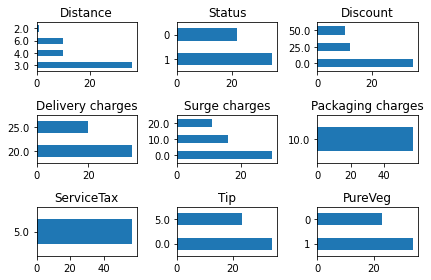

In [41]:
plt.figure(1)

plt.subplot(331)
swiggyToDataSet['Distance'].value_counts().plot.barh(title="Distance")

plt.subplot(332)
swiggyToDataSet['Status'].value_counts().plot.barh(title="Status")

plt.subplot(333)
swiggyToDataSet['Discount'].value_counts().plot.barh(title="Discount")

plt.subplot(334)
swiggyToDataSet['Delivery charges'].value_counts().plot.barh(title="Delivery charges")

plt.subplot(335)
swiggyToDataSet['Surge charges'].value_counts().plot.barh(title="Surge charges")

plt.subplot(336)
swiggyToDataSet['Packaging charges'].value_counts().plot.barh(title="Packaging charges")

plt.subplot(337)
swiggyToDataSet['ServiceTax'].value_counts().plot.barh(title="ServiceTax")

plt.subplot(338)
swiggyToDataSet['Tip'].value_counts().plot.barh(title="Tip")

plt.subplot(339)
swiggyToDataSet['PureVeg'].value_counts().plot.barh(title="PureVeg")

plt.tight_layout()
plt.show()

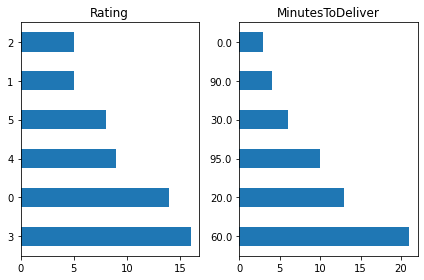

In [42]:
plt.figure(1)

plt.subplot(121)
swiggyToDataSet['Rating'].value_counts().plot.barh(title="Rating")

plt.subplot(122)
swiggyToDataSet['MinutesToDeliver'].value_counts().plot.barh(title="MinutesToDeliver")


plt.tight_layout()
plt.show()

Inferences from Univariate Analysis of the features:

Distance: Most of the orders are for delivery with distance = 3. The other distances seen in the dataset are: 2, 4 and 6. There are no orders for delivery less than 2 or greater than 6. We can conclude that for distance <2 and >6,  consumers don't prefer ordering online - probably because of higher delivery charges in case of higher distance and consumers preferring self pick-up/take away than online ordering for smaller distances.

Status: There are more orders with Delivered status than Cancelled ones.

Discount: Most transactions have Discount=0. Whenever discount was applicable it was either 25 or 50. 

Delivery Charges: In most cases this is 20. For few records the delivery charge is 25 (probably higher distance - 4 or 6). This can be further verified in multivariate analysis. 

Surge Charges: In most cases this is 0. We see other 2 values is 10 and 20 in this feature which must be for orders made during peak time that lead to surge charges being applied.

Tip: In most cases this is 0. There are few orders with Tip=5. A common tip value=5 may be a result of default and/or least tip (other than 0) on the application being 5.

Pure Veg: Majority of the orders are of type mix/non-veg and hence not pure-veg.

Rating: Majority ratings are 3 whereas there are many 0 ratings as well  which belong to Cancelled status as seen earlier.

Minutes to Deliver: Majority orders were delivered in 60 minutes while few took even more time like 90+ minutes to deliver. The orders were all delivered in 20-95 minutes range and few records with 0 minutes for delivery correspond to Cancelled orders as seen earlier.

Packaging Charges: This feature holds a constant value: 10 for all orders.

Service Tax: This feature holds a constant value: 5 for all orders.

Since Packaging charges and Service Tax have a single constant value for every order, these features can be dropped from the dataset as their presence does not contribute to define any difference in the orders.



In [43]:
# Dropping Packaging charges and ServiceTax features
swiggyToDataSet = swiggyToDataSet.drop(['Packaging charges', 'ServiceTax',], axis = 1)
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            57 non-null     float64
 1   Status              57 non-null     int64  
 2   Cost                57 non-null     float64
 3   Discount            57 non-null     float64
 4   Bill amount         57 non-null     float64
 5   Delivery charges    57 non-null     float64
 6   Surge charges       57 non-null     float64
 7   Tip                 57 non-null     float64
 8   PureVeg             57 non-null     int64  
 9   Rating              57 non-null     int64  
 10  MinutesToDeliver    57 non-null     float64
 11  PromoCode_BF        57 non-null     uint8  
 12  PromoCode_NOCODE    57 non-null     uint8  
 13  PromoCode_PRO       57 non-null     uint8  
 14  PaymentMode_CARD    57 non-null     uint8  
 15  PaymentMode_COD     57 non-null     uint8  
 16  PaymentMod

<AxesSubplot:title={'center':'Status vs Rating'}, xlabel='Status'>

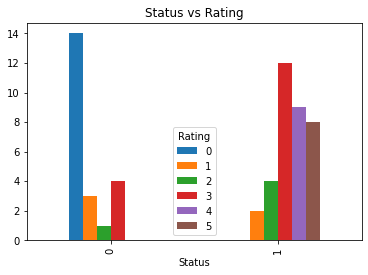

In [44]:
temp = pd.crosstab(swiggyToDataSet.Status,swiggyToDataSet.Rating)
temp.plot.bar(title="Status vs Rating")

It is evident from the plot above that Cancelled (0 label) orders get rating=0 and lower ratings like 1,2 etc. Cancelled orders do not get higher ratings like 4, 5 etc.

In case of Delivered orders, there are no 0 ratings and rating values range across the 1-5 depending on the customer experience.

<AxesSubplot:title={'center':'Delivery Charges vs Distance'}, xlabel='Delivery charges'>

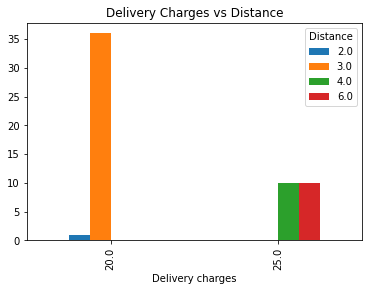

In [45]:
temp = pd.crosstab(swiggyToDataSet['Delivery charges'],swiggyToDataSet.Distance)
temp.plot.bar(title="Delivery Charges vs Distance")

Clearly the delivery charges levied are higher for higher distances. Its a fixed 20 for lower distances (<=3) and is 25 for distances equal to 4 & 6. Based on business rules, the delivery charges maybe further increased for next range of distances like 8-10, 10-15, 15+ etc.

<AxesSubplot:>

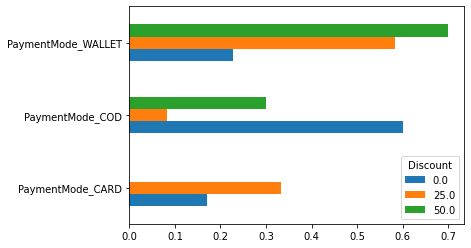

In [46]:
swiggyToDataSet.groupby('Discount')[['PaymentMode_CARD', 'PaymentMode_COD', 'PaymentMode_WALLET']].mean().T.plot(kind='barh')


The Wallet payment mode enjoys higher discounts compared to other payment codes and COD orders get the least discounts

<AxesSubplot:>

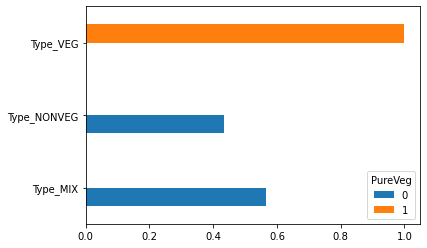

In [47]:
swiggyToDataSet.groupby('PureVeg')[['Type_MIX', 'Type_NONVEG', 'Type_VEG']].mean().T.plot(kind='barh')


Clearly the PureVeg feature is highly co-related to Type_VEG and has no relation with mix and non-veg types

# Correlation Check

<AxesSubplot:>

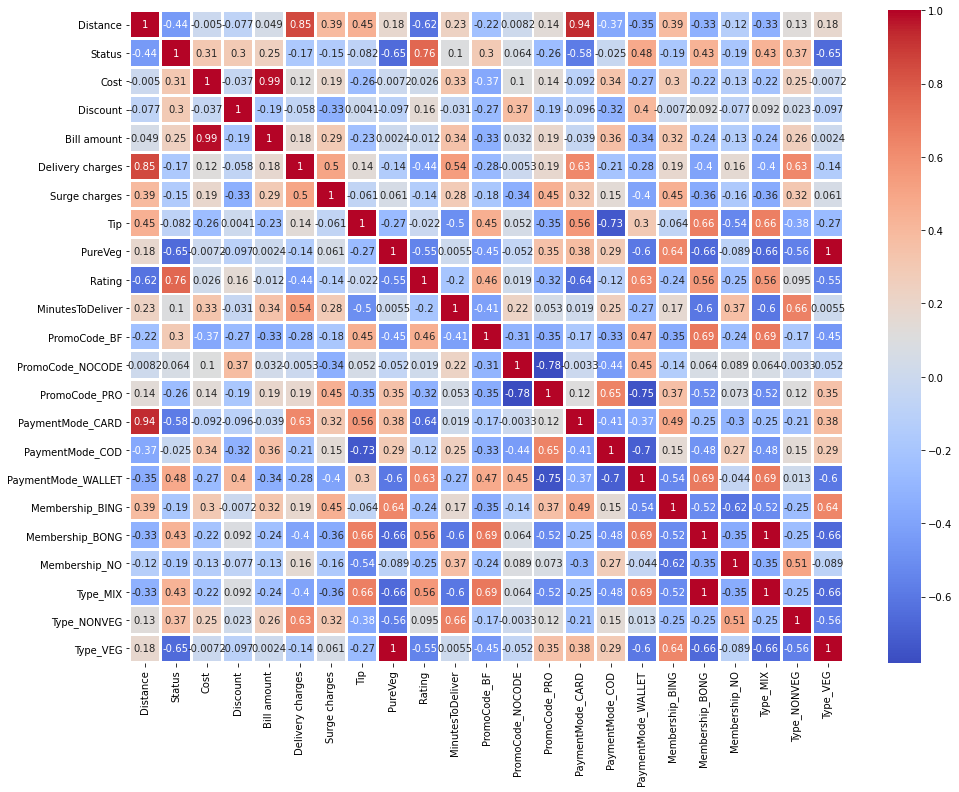

In [48]:
fig, ax = plt.subplots(figsize=(16,12))   
import seaborn as sns
sns.heatmap(swiggyToDataSet.corr(),linewidths=1.9,annot=True, cmap='coolwarm')

In [49]:
# Fetching features having corelation > 0.8
used = []
corrs = []
for i, j in enumerate(swiggyToDataSet.corr().columns):
    for k in range(len(swiggyToDataSet.corr())):
        if ((swiggyToDataSet.corr().iloc[k, i] > 0.8) & 
            (j not in used) &
            (j != swiggyToDataSet.corr().index[k])):
            
            used.append(j)
            corrs.append((j, swiggyToDataSet.corr().index[k], 
                          np.round(swiggyToDataSet.corr().iloc[k, i], 2)))

            
corrsswiggyToDataSet = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsswiggyToDataSet = corrsswiggyToDataSet.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsswiggyToDataSet[:20]

,column,row,corr
0,Distance,Delivery charges,0.85
1,Cost,Bill amount,0.99
2,Bill amount,Cost,0.99
3,Delivery charges,Distance,0.85
4,PureVeg,Type_VEG,1.0
5,PaymentMode_CARD,Distance,0.94
6,Membership_BONG,Type_MIX,1.0
7,Type_MIX,Membership_BONG,1.0
8,Type_VEG,PureVeg,1.0


In [50]:
#Dropping features Delivery Charges, Bill Amount, Type_VEG, PaymentMode_CARD, Type_MIX based on high corealtion
swiggyToDataSet.drop(['Delivery charges','Bill amount','Type_VEG','PaymentMode_CARD','Type_MIX'],axis=1,inplace=True)
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            57 non-null     float64
 1   Status              57 non-null     int64  
 2   Cost                57 non-null     float64
 3   Discount            57 non-null     float64
 4   Surge charges       57 non-null     float64
 5   Tip                 57 non-null     float64
 6   PureVeg             57 non-null     int64  
 7   Rating              57 non-null     int64  
 8   MinutesToDeliver    57 non-null     float64
 9   PromoCode_BF        57 non-null     uint8  
 10  PromoCode_NOCODE    57 non-null     uint8  
 11  PromoCode_PRO       57 non-null     uint8  
 12  PaymentMode_COD     57 non-null     uint8  
 13  PaymentMode_WALLET  57 non-null     uint8  
 14  Membership_BING     57 non-null     uint8  
 15  Membership_BONG     57 non-null     uint8  
 16  Membership

The list of reduced features after co-relation check is as above. Next the categorical vairables will be checked for relevance against target variable using Chi2 test

# Chi2 score check for categorical feature vs Target relation check

In [51]:
# interpret p-value
def interpret_p_value(prob, p):
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.9f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [52]:
# Extracting categorical features
X = swiggyToDataSet[['Status', 'PureVeg', 'PromoCode_BF', 'PromoCode_NOCODE', 'PromoCode_PRO', 'PaymentMode_COD', 'PaymentMode_WALLET','Membership_BING','Membership_BONG','Membership_NO','Type_NONVEG']]

In [53]:
to_retain=[]
to_drop=[]
for item in X.columns:    
    print('\n--------------------------------------------------------------')
    print(item,'')
    print('--------------------------------------------------------------')
    crosstab = pd.crosstab(swiggyToDataSet[item], swiggyToDataSet['Rating'])
    stat, p, dof, expected = chi2_contingency(crosstab)
    print("Chi-Squared Statistic = %.2f" %(stat))
    print("p-value = %.3f" %p)
    print('degrees of freedom = %d' % dof)
    if(p<=0.05):
        print('Dependent on Target')
        to_retain.append(item+':'+p.astype(str))
    else:
        print('Independent of Target')
        to_drop.append(item+':'+p.astype(str))
        
print('\n\n--------------------------------------------------------------')

print('Features to Retain with P Value > 0.05: ', to_retain)
print('\n\nFeatures to Drop with P Value <= 0.05: ', to_drop)
    


--------------------------------------------------------------
Status 
--------------------------------------------------------------
Chi-Squared Statistic = 35.90
p-value = 0.000
degrees of freedom = 5
Dependent on Target

--------------------------------------------------------------
PureVeg 
--------------------------------------------------------------
Chi-Squared Statistic = 19.64
p-value = 0.001
degrees of freedom = 5
Dependent on Target

--------------------------------------------------------------
PromoCode_BF 
--------------------------------------------------------------
Chi-Squared Statistic = 19.87
p-value = 0.001
degrees of freedom = 5
Dependent on Target

--------------------------------------------------------------
PromoCode_NOCODE 
--------------------------------------------------------------
Chi-Squared Statistic = 7.61
p-value = 0.179
degrees of freedom = 5
Independent of Target

--------------------------------------------------------------
PromoCode_PRO 
-------

In [54]:
#Dropping features PromoCode_NOCODE and Type_NONVEG on high chi2 score
swiggyToDataSet.drop(['PromoCode_NOCODE','Type_NONVEG'],axis=1,inplace=True)
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            57 non-null     float64
 1   Status              57 non-null     int64  
 2   Cost                57 non-null     float64
 3   Discount            57 non-null     float64
 4   Surge charges       57 non-null     float64
 5   Tip                 57 non-null     float64
 6   PureVeg             57 non-null     int64  
 7   Rating              57 non-null     int64  
 8   MinutesToDeliver    57 non-null     float64
 9   PromoCode_BF        57 non-null     uint8  
 10  PromoCode_PRO       57 non-null     uint8  
 11  PaymentMode_COD     57 non-null     uint8  
 12  PaymentMode_WALLET  57 non-null     uint8  
 13  Membership_BING     57 non-null     uint8  
 14  Membership_BONG     57 non-null     uint8  
 15  Membership_NO       57 non-null     uint8  
dtypes: float64

Reduced list of features after elimination based on ch2 test is seen above. Further reduction will happen during the backward stepwise feature selection

# Verifying data for outliers and normalizing before model building

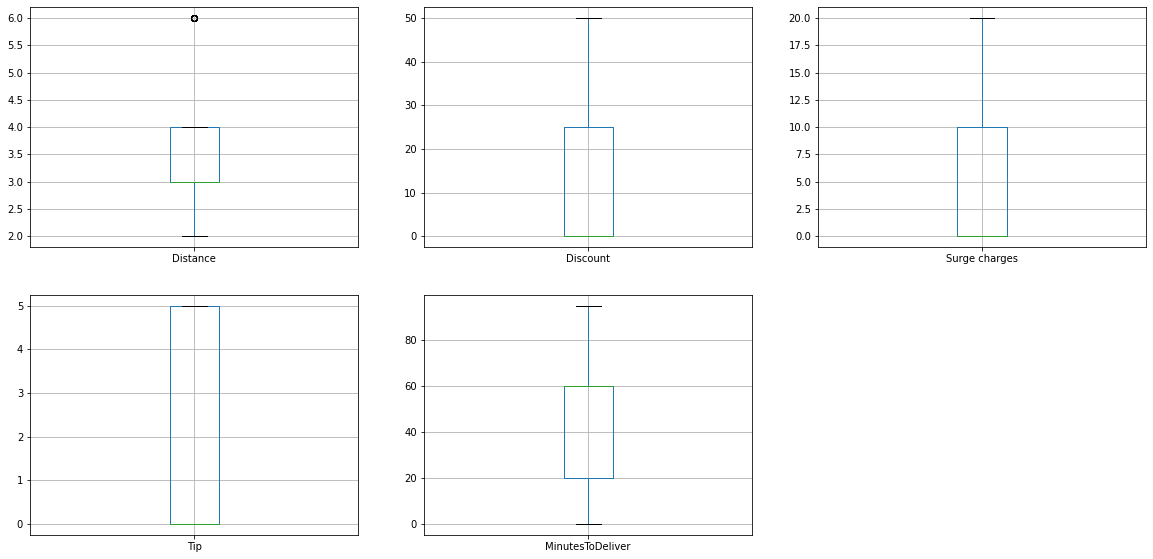

In [55]:
#Box PLot:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
swiggyToDataSet.boxplot(column='Distance')

plt.subplot(3,3,2)
swiggyToDataSet.boxplot(column='Discount')


plt.subplot(3,3,3)
swiggyToDataSet.boxplot(column='Surge charges')

plt.subplot(3,3,4)
swiggyToDataSet.boxplot(column='Tip')


plt.subplot(3,3,5)
swiggyToDataSet.boxplot(column='MinutesToDeliver')

plt.show()

In [56]:
swiggyToDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            57 non-null     float64
 1   Status              57 non-null     int64  
 2   Cost                57 non-null     float64
 3   Discount            57 non-null     float64
 4   Surge charges       57 non-null     float64
 5   Tip                 57 non-null     float64
 6   PureVeg             57 non-null     int64  
 7   Rating              57 non-null     int64  
 8   MinutesToDeliver    57 non-null     float64
 9   PromoCode_BF        57 non-null     uint8  
 10  PromoCode_PRO       57 non-null     uint8  
 11  PaymentMode_COD     57 non-null     uint8  
 12  PaymentMode_WALLET  57 non-null     uint8  
 13  Membership_BING     57 non-null     uint8  
 14  Membership_BONG     57 non-null     uint8  
 15  Membership_NO       57 non-null     uint8  
dtypes: float64

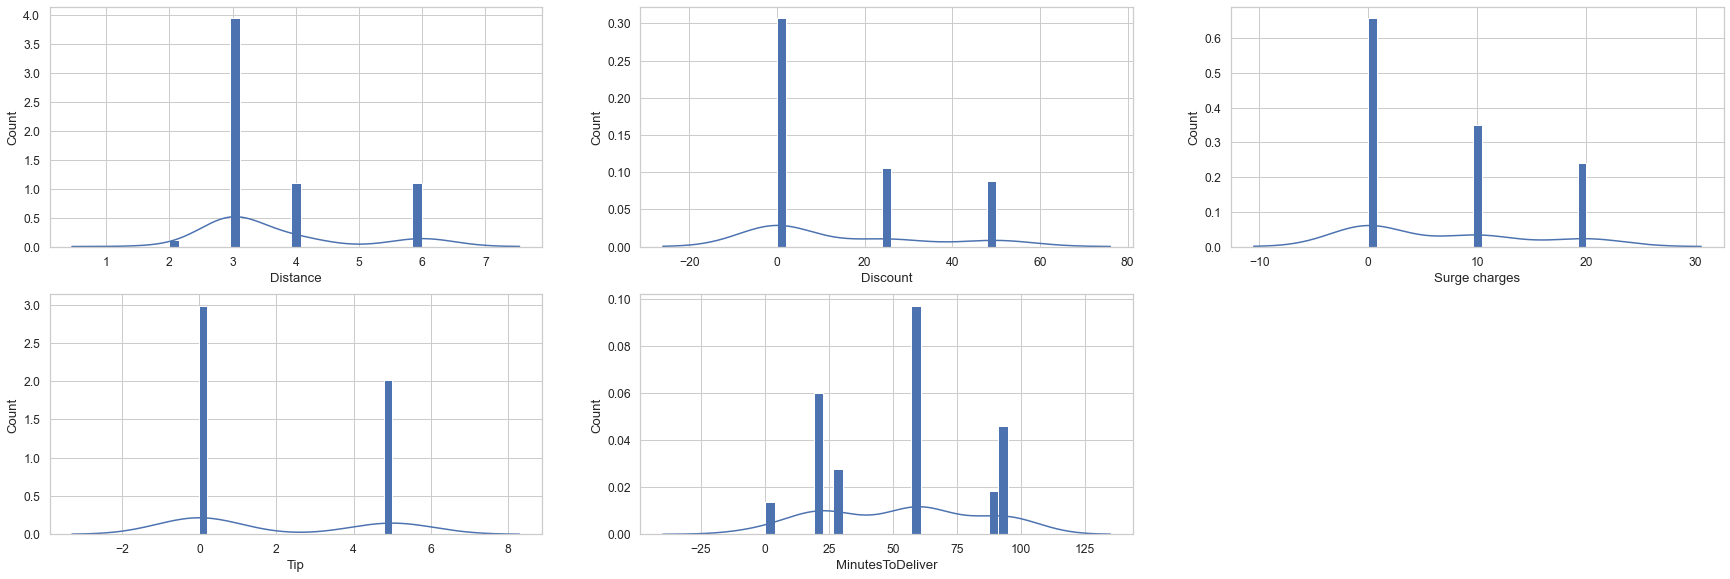

In [57]:
#Dist plot:
plt.figure(figsize=(30,15))
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 7]})
plt.subplot(3,3,1)
sns.distplot(
    swiggyToDataSet['Distance'], norm_hist=False, kde=True, bins=25, hist_kws={"alpha": 1}
).set(xlabel='Distance', ylabel='Count');

plt.subplot(3,3,2)
sns.distplot(
    swiggyToDataSet['Discount'], norm_hist=False, kde=True, bins=25, hist_kws={"alpha": 1}
).set(xlabel='Discount', ylabel='Count');

plt.subplot(3,3,3)
sns.distplot(
    swiggyToDataSet['Surge charges'], norm_hist=False, kde=True, bins=25, hist_kws={"alpha": 1}
).set(xlabel='Surge charges', ylabel='Count');

plt.subplot(3,3,4)
sns.distplot(
    swiggyToDataSet['Tip'], norm_hist=False, kde=True, bins=25, hist_kws={"alpha": 1}
).set(xlabel='Tip', ylabel='Count');

plt.subplot(3,3,5)
sns.distplot(
    swiggyToDataSet['MinutesToDeliver'], norm_hist=False, kde=True, bins=25, hist_kws={"alpha": 1}
).set(xlabel='MinutesToDeliver', ylabel='Count');
plt.show()

In [58]:
# Function to normalize the data using MinMaxScaler
def normalizeData(swiggyToDataSet):
    X = swiggyToDataSet.copy()
    scaler = MinMaxScaler()
    X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    return X 

In [59]:
# Normalizing the data using MinMaxScaler
X_normalized=normalizeData(swiggyToDataSet)
X_normalized.head()

,Distance,Status,Cost,Discount,Surge charges,Tip,PureVeg,Rating,MinutesToDeliver,PromoCode_BF,PromoCode_PRO,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO
0,0.25,1.0,0.40,1.0,0.0,0.0,1.0,0.4,0.631579,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.25,1.0,0.00,0.0,0.0,1.0,0.0,0.8,0.210526,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.00,0.0,0.30,0.5,0.5,1.0,1.0,0.0,0.315789,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.50,1.0,0.90,0.0,0.5,0.0,0.0,0.2,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.25,0.0,0.05,0.0,0.0,0.0,1.0,0.2,0.631579,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# Feature Selection using Backward Stepwise Elimination and Model Building

Below are the 2 models built using Backward Stepwise Elimination. The models have been built using 2 different approaches:

# Approach 1:

Approach 1 - Using Adjusted R2 as the scoring/evaluation factor:
    
    A custom class is written to perform a backward stepwise elimination using the best adjusted R2 values as the evaluation parameter.
    
    Since we are performing a linear regression using multiple features the Adjusted R2 was preferred over the R2 score for model evaluation
    
    Since we have only 57 records in the data-set and the intention is the find the best fitting features the entire dataset is used for evaluation and eliminating the features
    
    The elimination is performed till 1 feature remains and finally the trend is analysed and features corresponding to best Adjusted R2 score are considered
    
    Based on the output of the backward stepwise elimination alogirthm, the features are then eliminated and a model is built with training data (65% data) and evaluated by predicting on testing data (35% data) and eventually the performance factors are calculated.

In [96]:
# function to split full data into features and target dataframes
def splitFeaturesTarget(X, targetName):
    X=X_normalized.copy()
    Y=X.pop(targetName)
    Y=Y.to_numpy().reshape(-1,1)
    Y=pd.DataFrame(Y,columns=[targetName])
    return X,Y

In [77]:
X_normalized=normalizeData(swiggyToDataSet)
X,Y = splitFeaturesTarget(X_normalized,'Rating')
print('X Shape: ', X.shape)
print('Y Shape: ', Y.shape)

X Shape:  (57, 15)
Y Shape:  (57, 1)


In [78]:
# Class defining the custom functions to perform backward stepwise elimination using Adjusted R2 as the Scoring Metric
class SequentialBackwardSearch():
    
    # initializing the model estimator object and number of features to be reduced to
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
         
    # Function to fit the model and reduce the features based on best Adjusted R2 Score
    def fitLR(self, x_train, x_test, y_train, y_test):
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train.values, x_test.values,
                                 y_train.values, y_test.values, self.indices_)
        self.scores_ = [score]
        
        # iterate till defined number of features is reached
        count=0
        while dim > k_features:
            print('--------------------------------------------------------------------------------------------------------------')
            count+=1
            print('Iteration: ', count)
            print('--------------------------------------------------------------------------------------------------------------')
            scores = []
            subsets = []
            
            # iterate through all combinations of features at each level/number of features
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train.values, x_test.values, y_train.values, y_test.values, p)
                scores.append(score)
                subsets.append(p)
                
            # Get the index of best score in current iteration
            best_score_index=self.getBestScoreIndex(scores)
            # store the best score from current iteration
            self.scores_.append(scores[best_score_index])
            # store the features that correspond to best score identified
            self.indices_ = subsets[best_score_index]
            self.subsets_.append(self.indices_)
           
            # Display key data points in each iteration
            print('Starting Features Count: ', dim, '\n')
            print('Ending Features Count: ', dim-1, '\n')
            print('Features Removed: ', set (x_train.columns).difference(x_train.columns[[subsets[best_score_index]]]), '\n')
            print('Features Retained: ', set (x_train.columns).intersection(x_train.columns[[subsets[best_score_index]]]), '\n')
            print('Best Score: ', scores[best_score_index], '\n')            
            dim -= 1 # Dimension is reduced by 1
     
    # Calculate the adjusted r2
    def _calc_score(self, x_train, x_test, y_train, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(x_test[:, indices])
        score = 1 - ((1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test[:, indices].shape[1]-1))
        return score
    
    # return relevant details corresponding to best found r2 score after all iterations
    def fetchBestScoreDetails(self,x_train):
        #best_score_index = np.argmax(self.scores_)
        best_score_index = self.getBestScoreIndex(self.scores_)
        best_score=(self.scores_[best_score_index])
        indices=x_train.columns[[self.subsets_[best_score_index]]]
        removed_indices= (x_train.columns).difference(indices)
        return best_score, indices, removed_indices
        
    # return the index of list having the best R2 score at each layer/iteration    
    def getBestScoreIndex(self, scores):
        tempScores=[]
        for item in scores:
            if(item>1):
                continue
            else:
                tempScores.append(item)
        if(len(tempScores)>0):
            bestScore=max(tempScores)
            bestScoresIndex=scores.index(bestScore)
        else:          
            bestScore=min(scores)
            bestScoresIndex=scores.index(bestScore)
        return bestScoresIndex
                
        

In [79]:
# Create object of LinearRegression
reg=LinearRegression()
# Define until how many features elimination needs to be done
k_features=1 # eliminating till last feature to compare values and observe the trend
sbs = SequentialBackwardSearch(reg, k_features)
# Defining the training and testing sets - 
# keeping full set for training and testing since data is very less and the objective is to find best features
#
x_train=X.copy()
x_test=X.copy()
y_train=Y.copy()
y_test=Y.copy()

# Fir the model and get the key stats
sbs.fitLR(x_train, x_test, y_train, y_test)

--------------------------------------------------------------------------------------------------------------
Iteration:  1
--------------------------------------------------------------------------------------------------------------
Starting Features Count:  15 

Ending Features Count:  14 

Features Removed:  {'Membership_NO'} 

Features Retained:  {'PromoCode_BF', 'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG', 'PureVeg', 'Discount', 'Status', 'PaymentMode_COD', 'Cost', 'Surge charges', 'Distance', 'MinutesToDeliver', 'PromoCode_PRO', 'Tip'} 

Best Score:  0.7758985086043074 

--------------------------------------------------------------------------------------------------------------
Iteration:  2
--------------------------------------------------------------------------------------------------------------
Starting Features Count:  14 

Ending Features Count:  13 

Features Removed:  {'Membership_NO', 'Membership_BONG'} 

Features Retained:  {'PromoCode_BF', 'Payment

Above we can see the Features removed and retained and best Adjusted R2 score at in each iteration.

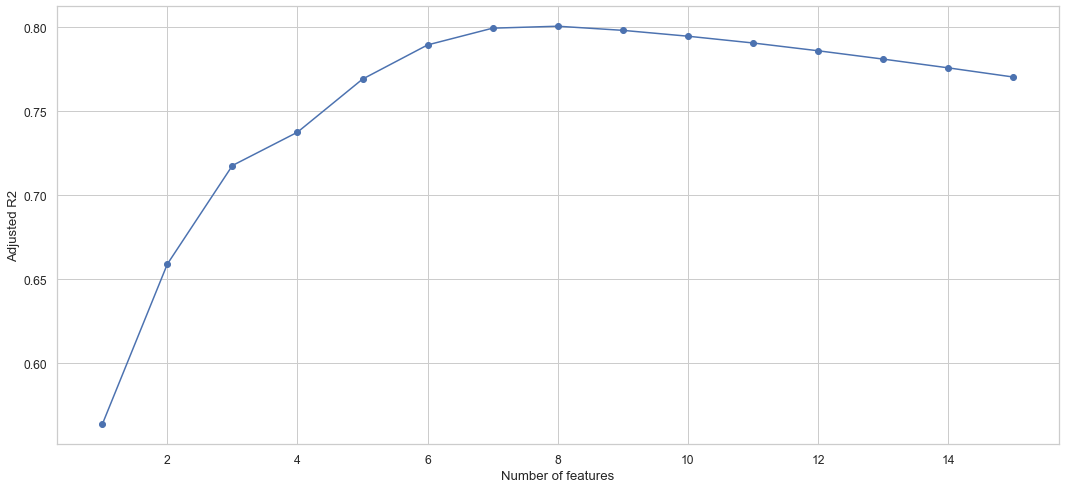

[0.7704326185702661, 0.7758985086043074, 0.781110171194905, 0.7860751584445018, 0.7907089696611456, 0.7947418414253992, 0.7982267668912928, 0.8006845427969339, 0.7995230515267383, 0.7895398061738809, 0.7691727730771458, 0.7375514409108018, 0.7176954068919048, 0.6589776575136159, 0.5635191948813649]


In [80]:
# Plot the trend of adjusted R2 variation as features are eliminated
k_features = [len(k) for k in sbs.subsets_]
plt.plot(k_features, sbs.scores_, marker='o')
#plt.ylim([0.7, 1.02])
plt.ylabel('Adjusted R2')
plt.xlabel('Number of features')
plt.grid(True)
plt.tight_layout()
plt.show()
print(sbs.scores_)

The graph above shows the trend during each iteration of the backward stepwise elimination. As the features reduce the Adjusted R2 improves and after a certain point i.e. Features count = 8, the adjusted r2 starts decreasing.

The code below extracts the details of the iteration that gave the best R2 score

In [81]:
# Display details of best combination identified based on best Adjusted R2 score
bestScore,bestIndices, removedIndices=sbs.fetchBestScoreDetails(x_train)
print('Best Adjusted R2: ', bestScore, '\n')
print('Optimal Features Size: ', bestIndices.size, '\n')
print('Optimal Features: ', bestIndices.values, '\n')
print('Removed Features: ', removedIndices, '\n')


Best Adjusted R2:  0.8006845427969339 

Optimal Features Size:  8 

Optimal Features:  ['Distance' 'Status' 'Cost' 'Discount' 'PureVeg' 'PromoCode_PRO'
 'PaymentMode_WALLET' 'Membership_BING'] 

Removed Features:  Index(['Membership_BONG', 'Membership_NO', 'MinutesToDeliver',
       'PaymentMode_COD', 'PromoCode_BF', 'Surge charges', 'Tip'],
      dtype='object') 



Dropping the features as seen above and building a model and testing with training-testing split

In [82]:
# Drop the features as identified by backward step-wise elimination alogrithm
X_normalized=X_normalized.drop(removedIndices, axis=1)
X_normalized.shape

(57, 9)

In [83]:
# function to randomly split data into training and testing sets - 65-35 split done here as total data size is too low
def splitData(X,Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state = 100)
    y_train=y_train.to_numpy().reshape(-1,1)
    y_train=pd.DataFrame(y_train,columns=['Rating'])
    y_test=y_test.to_numpy().reshape(-1,1)
    y_test=pd.DataFrame(y_test,columns=['Rating'])
    return x_train, x_test, y_train, y_test

In [84]:
X=X_normalized.copy()
X,Y = splitFeaturesTarget(X_normalized,'Rating')
print('X Shape: ', X.shape)
print('Y Shape: ', Y.shape)
x_train, x_test, y_train, y_test = splitData(X,Y)
print('x_train Shape: ', x_train.shape)
print('x_test Shape: ', x_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape: ', y_test.shape)

X Shape:  (57, 8)
Y Shape:  (57, 1)
x_train Shape:  (37, 8)
x_test Shape:  (20, 8)
y_train Shape:  (37, 1)
y_test Shape:  (20, 1)


After the 65:35 split, the training set has 37 records and the testing set has 20

In [85]:
# Fit the linear regression model with reduced feature set and training data
reg.fit(x_train,y_train)
# Predict on testing set using the trained linear regression model 
y_pred = reg.predict(x_test)

# Calculate the key performance metrics of the model
Adj_r2 = 1 - ((1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('Adjusted R2 score: ',Adj_r2)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('Intercept: ', reg.intercept_)
print('Coefficients: ', reg.coef_)

Adjusted R2 score:  0.7195591262235566
MSE:  0.013248617279038718
RMSE:  0.11510263801945948
Intercept:  [0.38333524]
Coefficients:  [[-0.4730849   0.28742354 -0.14970783 -0.10993431 -0.19708873  0.10400077
   0.37622676  0.29162457]]


As seen above, the model was fit using the reduced set of features and since the training and testing data was split we could see an adjusted R2 score of 0.72 in testing data prediction and a low error score of MSE=0.013 and RMSE=0.11

# Approach 2:

Approach 2 - Using SequentialFeatureSelector and MSE as the evaluation factor:
    
    Full data is used to do backward stepwise elimination using SequentialFeatureSelector and MSE as the evaluation measure.
    
    At the end of each iteration the model is built using the features after elimination: trained on training data and predictions on testing data.
    
    The Adjusted R2, MSE, RMSE are calculated and recorded at each iteration.
    
    Eventually the combination having least MSE is extracted.

In [86]:
X_normalized=normalizeData(swiggyToDataSet)
X,Y = splitFeaturesTarget(X_normalized,'Rating')
print('X Shape: ', X.shape)
print('Y Shape: ', Y.shape)

X Shape:  (57, 15)
Y Shape:  (57, 1)


In [91]:
# Define lists to store info from every iteration
fcount=[]
mseArr=[]
fNames=[]
ar2=[]
intercept=[]
coef=[]
# iterate till all features are reduced
count=0
for i in reversed(range(1,X.shape[1]+1)):
    print('--------------------------------------------------------------------------------------------------------------')
    count+=1
    print('Iteration: ', count)
    print('--------------------------------------------------------------------------------------------------------------')
    lreg = LinearRegression()
    # define the backward selector using MSE as the scoring factor
    sfs1 = sfs(lreg, k_features=i, forward=False, verbose=0, scoring='neg_mean_squared_error')
    # fit the model using full data set
    sfs1 = sfs1.fit(X, Y)
    feat_names = list(sfs1.k_feature_names_)
    fNames.append(feat_names)
    print('Selected Features: ', feat_names,'\n')
    print('Selected Features Count: ', len(feat_names),'\n')
    fcount.append(len(feat_names))
    # get the reduced dataset
    new_data = X_normalized[feat_names]
    # split into training and testing sets
    x_train, x_test, y_train, y_test = splitData(new_data,Y)
    
    # fit the model with training set on reduced features
    lreg.fit(x_train,y_train)
    # predict testing set using trained model
    y_pred=lreg.predict(x_test)
    # Calculate key model performance metrics based on predictions on testing set
    score = 1 - ((1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
    print('Adjusted R2: ', score, '\n')
    ar2.append(score)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print('MSE: ', mse, '\n')
    mseArr.append(mse)
    print('RMSE: ', rmse, '\n')
    print('Intercept: ', lreg.intercept_)
    intercept.append(lreg.intercept_)
    print('Coefficients: ', lreg.coef_)
    coef.append(lreg.coef_)

--------------------------------------------------------------------------------------------------------------
Iteration:  1
--------------------------------------------------------------------------------------------------------------
Selected Features:  ['Distance', 'Status', 'Cost', 'Discount', 'Surge charges', 'Tip', 'PureVeg', 'MinutesToDeliver', 'PromoCode_BF', 'PromoCode_PRO', 'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG', 'Membership_NO'] 

Selected Features Count:  15 

Adjusted R2:  -0.44911338495826136 

MSE:  0.024894242571072443 

RMSE:  0.15777909421426034 

Intercept:  [0.18829863]
Coefficients:  [[-0.29271082  0.27951856 -0.0751831  -0.07046389  0.01411518 -0.13772897
  -0.01230612  0.2478788   0.04233317  0.18763957 -0.05025564  0.38047523
   0.03260596  0.19249062 -0.22509658]]
--------------------------------------------------------------------------------------------------------------
Iteration:  2
------------------------------------

Selected Features:  ['Distance', 'PureVeg', 'Membership_BING'] 

Selected Features Count:  3 

Adjusted R2:  0.6863367082443166 

MSE:  0.02155362072190633 

RMSE:  0.14681151426882813 

Intercept:  [1.00573868]
Coefficients:  [[-0.87025417 -0.51458499  0.35015886]]
--------------------------------------------------------------------------------------------------------------
Iteration:  14
--------------------------------------------------------------------------------------------------------------
Selected Features:  ['Distance', 'PureVeg'] 

Selected Features Count:  2 

Adjusted R2:  0.5155837577047311 

MSE:  0.03536748480589458 

RMSE:  0.18806244921805781 

Intercept:  [0.97353229]
Coefficients:  [[-0.65508806 -0.3401908 ]]
--------------------------------------------------------------------------------------------------------------
Iteration:  15
--------------------------------------------------------------------------------------------------------------
Selected Features:  ['D

Above we can see the Features retained at each iteration based on least MSE and also the adjusted R2, MSE and RMSE after fitting a model using the reduced features and calculating the performance metrics on testing data predictions

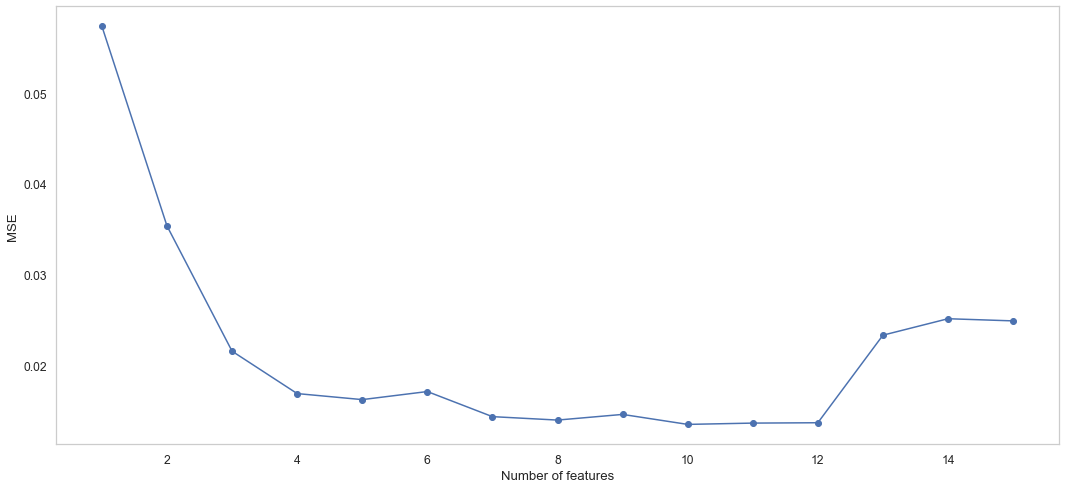

[0.024894242571072443, 0.02513282682954221, 0.023318873737505557, 0.013664084222088585, 0.01362413648856746, 0.013481922623553192, 0.014581814883262148, 0.013957941540644017, 0.014336754867645915, 0.017103690682009724, 0.016214315513875473, 0.016879067806214933, 0.02155362072190633, 0.03536748480589458, 0.057384527220034884]


In [92]:
# Plot the trend of MSE variation as features are eliminated

plt.plot(fcount, mseArr, marker='o')
#plt.ylim([0.7, 1.02])
plt.ylabel('MSE')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()
print(mseArr)

The graph above shows the trend during each iteration of the backward stepwise elimination. As the features reduce the MSE improves and after a certain point i.e. Features count = 10, the MSE deteriorates.

The code below extracts the details of the iteration that gave the best/least MSE

In [94]:
# Display details of best combination identified based on least MSE
index=mseArr.index(np.min(mseArr))
print('Optimal Features Size: ', fcount[index], '\n')
print('Optimal Features: ', fNames[index], '\n')
print('Removed Features: ', set (X.columns).difference(fNames[index]), '\n')
print('Adjusted R2: ', ar2[index], '\n')
print('MSE: ',  mseArr[index], '\n')
print('RMSE: ',  np.sqrt(mseArr[index]), '\n')
print('Intercept: ', intercept[index])
print('Coefficients: ', coef[index])

Optimal Features Size:  10 

Optimal Features:  ['Distance', 'Status', 'Cost', 'Discount', 'Tip', 'PureVeg', 'MinutesToDeliver', 'PaymentMode_WALLET', 'Membership_BING', 'Membership_NO'] 

Removed Features:  {'PromoCode_BF', 'Membership_BONG', 'Surge charges', 'PaymentMode_COD', 'PromoCode_PRO'} 

Adjusted R2:  0.6512029822337819 

MSE:  0.013481922623553192 

RMSE:  0.11611168168428701 

Intercept:  [0.67408715]
Coefficients:  [[-0.25361365  0.28096441 -0.1694735  -0.08302376 -0.2034744  -0.1864418
  -0.06796614  0.26171713  0.07902462 -0.22664292]]


As seen above, the model was fit using the reduced set of features and with training and testing data split. We could see an adjusted R2 score of 0.65 in testing data prediction and a low error score of MSE=0.013 and RMSE=0.11

# Comparison of observations from the 2 modeling approaches

In [74]:
data = {'Approach':['Adjusted R2 Based', 'MSE Based'], 'Features Count':['8', '10'], 'Adjusted R2':['0.72', '0.65'], 'MSE':['0.013', '0.013'], 'RMSE':['0.11', '0.11']}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,Approach,Features Count,Adjusted R2,MSE,RMSE
0,Adjusted R2 Based,8,0.72,0.013,0.11
1,MSE Based,10,0.65,0.013,0.11


The first approach gives us a higher Adjusted R2 score with same error measures as in second approach.

The number of data in the given problem is very less (57). A dataset with more orders data would be ideal to compare and further refine and arrive at a model that would be best suited to predict the ratings.